In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5436,7246-ZGQDF,Female,0,No,Yes,1,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,54.50,54.5,No
2314,8197-BFWVU,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),93.25,6688.95,No
4469,6893-ODYYE,Male,0,No,No,50,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,4549.45,No
5871,0733-VUNUW,Male,0,No,No,24,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.65,1400.55,Yes
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


In [3]:
df.drop("customerID" ,axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [5]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df1 = df[df.TotalCharges!=' ']
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\royal\AppData\Local\Temp\ipykernel_31088\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [8]:
df1.replace("No internet service", 'No', inplace=True)
df1.replace("No phone service", 'No', inplace=True)

C:\Users\royal\AppData\Local\Temp\ipykernel_31088\625972513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", 'No', inplace=True)
C:\Users\royal\AppData\Local\Temp\ipykernel_31088\625972513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", 'No', inplace=True)


In [9]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\royal\AppData\Local\Temp\ipykernel_31088\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [10]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\royal\AppData\Local\Temp\ipykernel_31088\3951318906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [11]:
df2 = pd.get_dummies(data=df1,columns=['InternetService', 'Contract', 'PaymentMethod'])

In [12]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [13]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [15]:
from tensorflow import keras

In [58]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight= weights)
    
    print(model.evaluate(X_test, y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification Report: \n", classification_report(y_test, y_preds))
    return y_preds

In [17]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4814 - accuracy: 0.7719


[0.4813809394836426, 0.7718549966812134]

In [18]:
yp = model.predict(X_test)
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 3ms/step


In [19]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [20]:
y_test[:10]

C:\Users\royal\AppData\Local\Temp\ipykernel_31088\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [23]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       999
           1       0.66      0.45      0.53       408

    accuracy                           0.77      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

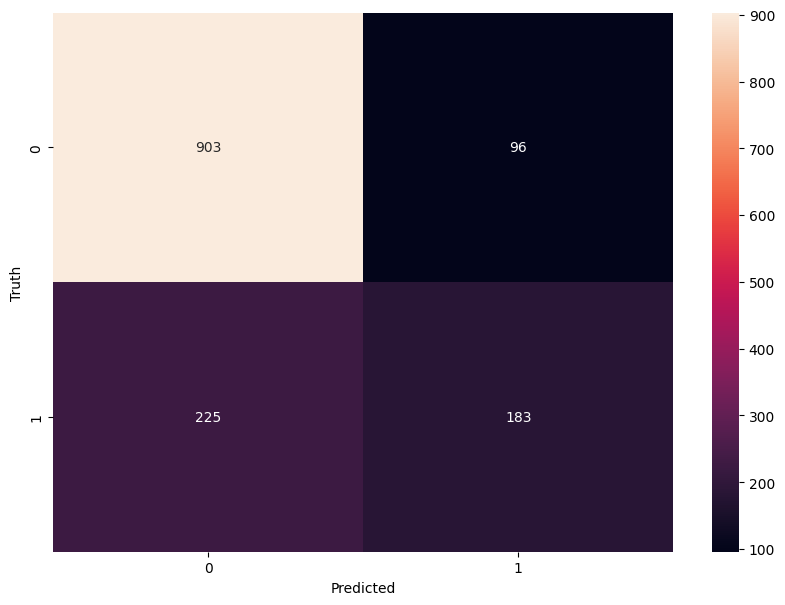

In [22]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
count_class_0, count_class_1 = df1.Churn.value_counts()
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [25]:
df_class_0.shape

(5163, 27)

In [26]:
df_class_1.shape

(1869, 27)

In [29]:
count_class_0, count_class_1

(5163, 1869)

In [31]:
# by undersampling
df_class_0_under = df_class_0.sample(count_class_1)

In [40]:
df_test_under = pd.concat([df_class_0_under, df_class_1])

In [41]:
print(df_test_under.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [50]:
x1 = df_test_under.drop('Churn', axis='columns')
y1 = df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=15, stratify=y1)

In [51]:
y_train1.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [49]:
X_test1.shape

(748, 26)

In [59]:
y_preds = ANN(X_train1, y_train1, X_test1, y_test1, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6145 - accuracy: 0.6886
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7575
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7689
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7649
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7686
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.8087
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8087
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8084
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8157
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4143 - accuracy: 0.8054
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8094
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8070
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8110
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8080
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8077
Epoch 93/100


In [60]:
y_preds[:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [61]:
y_test[:5]

C:\Users\royal\AppData\Local\Temp\ipykernel_31088\1754177261.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:5]


5585    1
6835    0
6020    0
1001    1
3084    0
Name: Churn, dtype: int64

In [62]:
#by oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [63]:
df_class_1_over.shape

(5163, 27)

In [64]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [66]:
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [67]:
x2 = df_test_over.drop('Churn', axis='columns')
y2 = df_test_over['Churn']
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=15, stratify=y2)

In [68]:
y_train2.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [69]:
y_preds = ANN(X_train2, y_train2, X_test2, y_test2, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 3ms/step - loss: 0.5630 - accuracy: 0.7067
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4918 - accuracy: 0.7588
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4849 - accuracy: 0.7594
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4791 - accuracy: 0.7659
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4757 - accuracy: 0.7734
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.7731
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4700 - accuracy: 0.7720
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4675 - accuracy: 0.7728
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4648 - accuracy: 0.7763
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4631 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3886 - accuracy: 0.8207
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3864 - accuracy: 0.8230
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8240
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.8237
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3846 - accuracy: 0.8238
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3844 - accuracy: 0.8202
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3823 - accuracy: 0.8269
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3836 - accuracy: 0.8246
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3822 - accuracy: 0.8271
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3824 - accuracy: 

In [72]:
x3 = df2.drop('Churn', axis='columns')
y3 = df2['Churn']

In [73]:
y3.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [76]:
#using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x3,y3)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [79]:
y_train3.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [80]:
y_preds = ANN(X_train3, y_train3, X_test3, y_test3, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 4ms/step - loss: 0.5193 - accuracy: 0.7517
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4678 - accuracy: 0.7747
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.7799
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4529 - accuracy: 0.7862
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.7897
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4405 - accuracy: 0.7942
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.7973
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8002
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.7995
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4225 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3503 - accuracy: 0.8436
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8439
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8455
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8398
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8456
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3535 - accuracy: 0.8444
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8461
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3487 - accuracy: 0.8459
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8464
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 